1) importing required librarys
2) load our dataset
3) geting basic information about our dataset
4) data pre-processing
5) exploratory data analysis
6) feature engineering
7) model selection & training
8) model evaluation

##### IMPORTING REQUIRED LIBRARYS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### LOAD OUR DATASET

In [2]:
df = pd.read_csv('Student_Performance.csv')  # dataset loading

In [3]:
df.head()  # display first 5 entry's

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


NOTE: target feature(dependent) is "Performance Index" and balance all feature is (independent)

In [4]:
print(f"df size is :{df.shape} \n rows: {df.shape[0]} \n columns: {df.shape[1]}")

df size is :(10000, 6) 
 rows: 10000 
 columns: 6


##### GETTIG BASIC INFORMATION ABOUT OUR DATASET

In [5]:
df.info()   # data type information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()  # descriptive analysis for numerical features

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


NOTE: 

1) Hours Studied             - 1hr to 9hr's
2) Sleep Hours               - 1.7hr to 9hr's
3) Question Papers Practiced - 5 to 9

In [7]:
df.describe(include='O')  # descriptive analysis for non-numerical features

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


NOTE: most of the student don't do Extracurricular Activities

##### DATA PRE-PROCESSING

In [8]:
columns_name = [i.replace(' ','_') for i in df.columns ]

In [9]:
columns_name

['Hours_Studied',
 'Previous_Scores',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Sample_Question_Papers_Practiced',
 'Performance_Index']

In [10]:
df.columns = columns_name   # changeing columns names

In [11]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


###### 1) chceking null values

In [12]:
df.isnull().sum()

Hours_Studied                       0
Previous_Scores                     0
Extracurricular_Activities          0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
dtype: int64

NOTE: we don't have any null values

###### 2) checking duplicate values

In [13]:
df.duplicated().sum()

127

NOTE: 127 duplicate values present in our dataset

In [14]:
duplicate_values = df[df.duplicated()]

In [15]:
duplicate_values.head()  # first 5 entry's in duplicated values

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0


In [16]:
df = df.drop_duplicates()   # drop duplicate values 

In [17]:
df.shape   # checking again df size ,we droped 127 entry's 

(9873, 6)

In [18]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [19]:
df.reset_index(drop=True,inplace=True)   # reset index

###### 3) SPLIT- NUMERICAL AND NON-NUMERICAL FEATURES

In [20]:
numberical_features = [colunm for colunm in df.columns if df[colunm].dtype != 'O']

In [21]:
numberical_features

['Hours_Studied',
 'Previous_Scores',
 'Sleep_Hours',
 'Sample_Question_Papers_Practiced',
 'Performance_Index']

###### 4) checking outliers {numerical features}

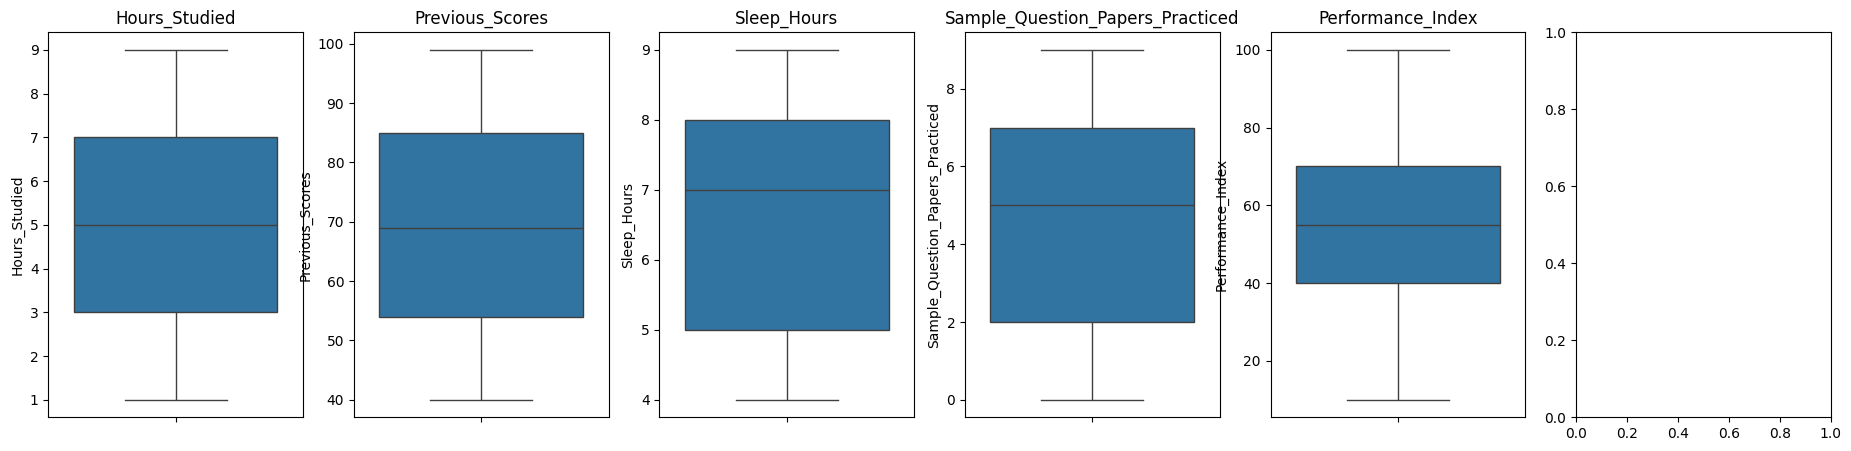

In [22]:
fig,ax = plt.subplots(ncols=6,nrows=1,figsize=(23,5))
ax = ax.flatten()
for i,col in enumerate(numberical_features):
    sns.boxplot(df[col],ax=ax[i])
    ax[i].set_title(col)

NOTE: our dataset is not haveing any outliers

###### 5) processing - non-numerical feature 

In [23]:
non_numerical_features = [column for column in df.columns if df[column].dtype == 'O']

In [24]:
df[non_numerical_features] 

,Extracurricular_Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9868,Yes
9869,Yes
9870,Yes
9871,Yes


In [25]:
non_numerical_encoding = pd.get_dummies(df[non_numerical_features],dtype='int',drop_first=True)  # one hot encoding

In [26]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [27]:
df = pd.concat([df,non_numerical_encoding],axis=1)  # joining two dataset 

In [28]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index,Extracurricular_Activities_Yes
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [29]:
df = df.drop('Extracurricular_Activities',axis=1)    # droping 'Extracurricular Activities'

In [30]:
df.head()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index,Extracurricular_Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


#### EXPLORATORY DATA ANALYSIS

###### 1) univariate analysis

In [31]:
len(df.columns)

6

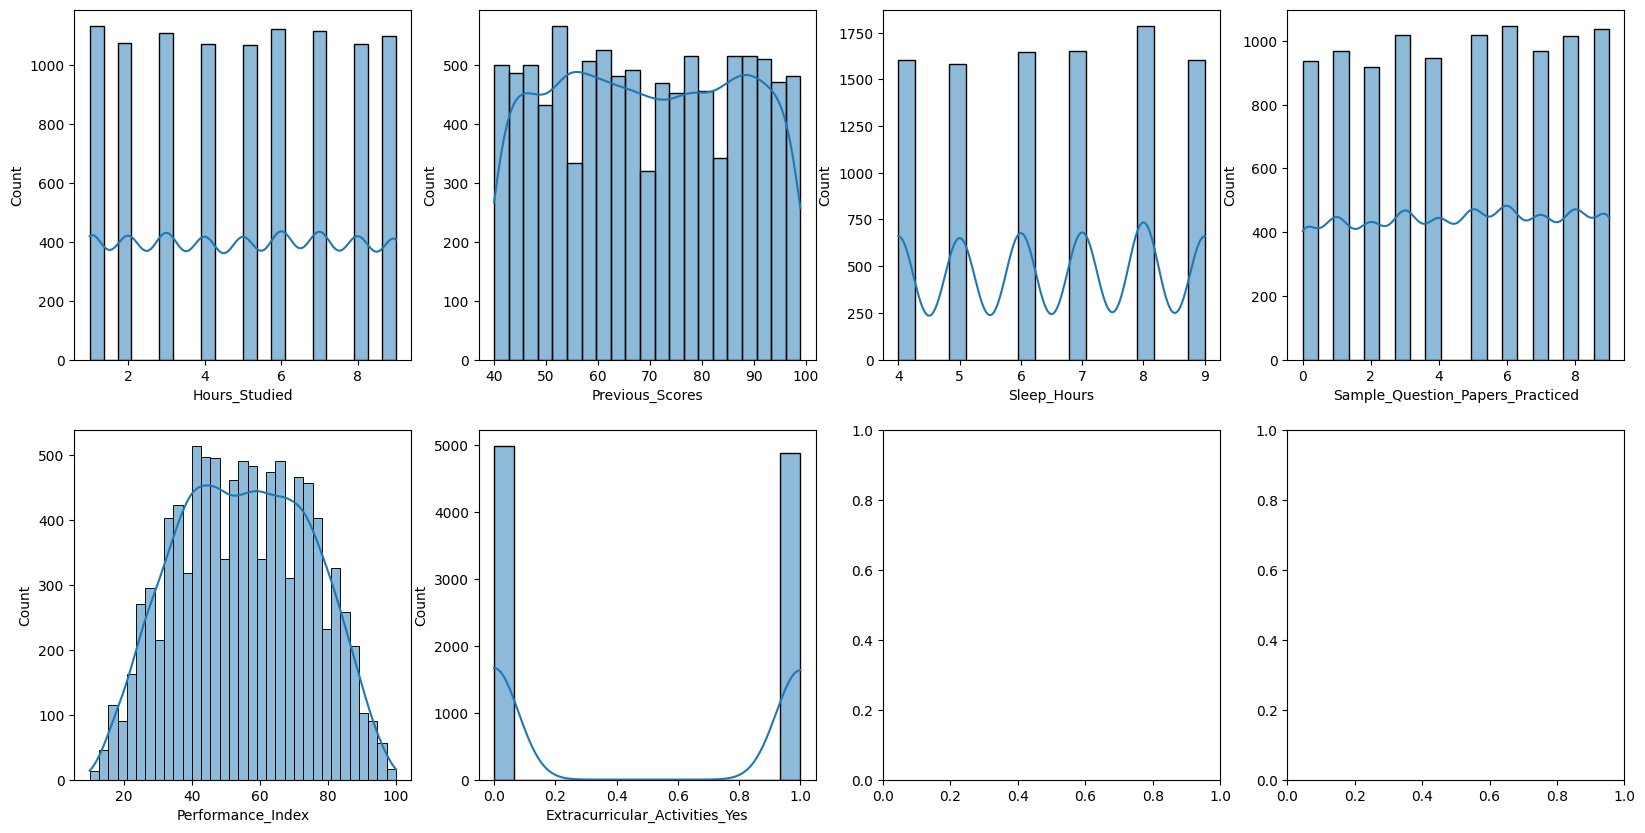

In [32]:
fig,ax = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
ax = ax.flatten()
for i,col in enumerate(df.columns):
    sns.histplot(df[col],ax=ax[i],kde=True)

NOTE: our target feature having normal distribution

###### 2) bivariate analysis

<Axes: xlabel='Hours_Studied', ylabel='Performance_Index'>

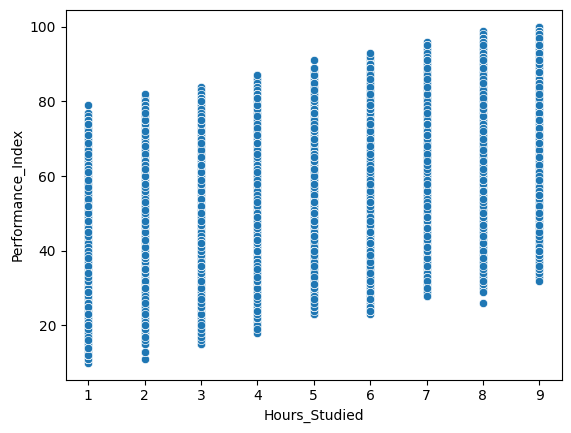

In [33]:
sns.scatterplot(x=df['Hours_Studied'],y=df['Performance_Index'])

<Axes: xlabel='Previous_Scores', ylabel='Performance_Index'>

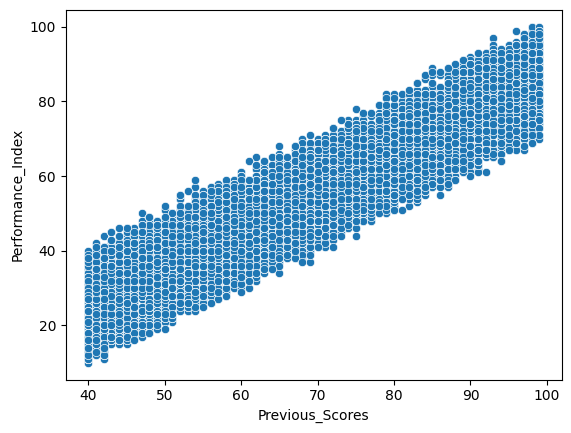

In [34]:
sns.scatterplot(x=df['Previous_Scores'],y=df['Performance_Index'])

NOTE: hours_study & previous_scores having linear relationship 

###### 3) multivariate analysis

<Axes: >

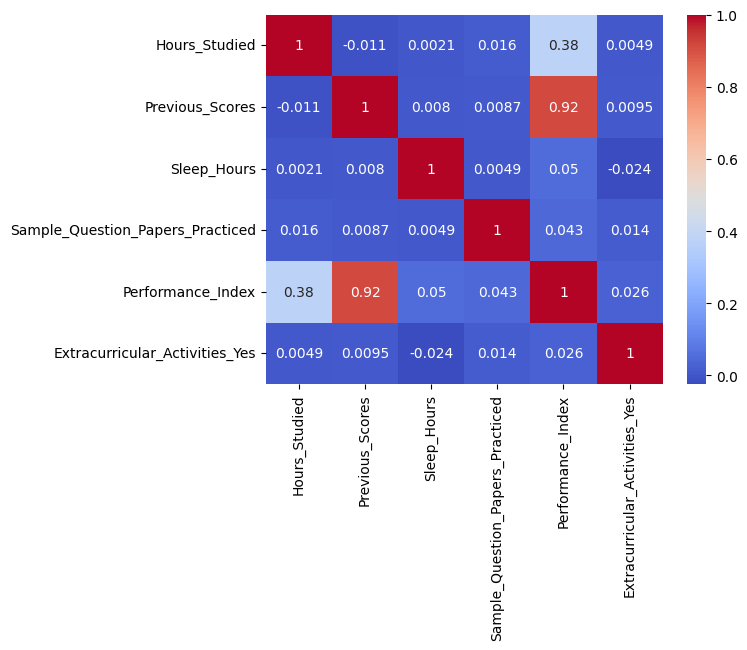

In [38]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

NOTE: all the features giving some informations to find performance index particularly previous scores giving 92% information

#### FEATURE ENGINEERING 

all the features are giving some informations to predict target feature so we don't need to remove any features

#### MODEL SELECTION AND TRAINGING

###### 1) split dependent and independent features

In [39]:
x = df.drop('Performance_Index',axis=1)   # independent features excudeing performance index
y = df['Performance_Index']              # dependent feature 

###### 2) scaling

In [40]:
from sklearn.preprocessing import StandardScaler     # scaling all values into -4 to +4
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
x_scaled

array([[ 0.77556551,  1.7061685 ,  1.45402483, -1.24971491,  1.01007813],
       [-0.38320542,  0.72491187, -1.49131517, -0.90092522, -0.99002243],
       [ 1.16182248, -1.06443844,  0.27588883, -0.90092522,  1.01007813],
       ...,
       [ 0.38930853,  0.78263285,  0.86495683,  0.14544385,  1.01007813],
       [ 1.54807946,  1.59072654,  0.27588883, -1.59850461,  1.01007813],
       [ 0.77556551,  0.26314405,  0.86495683, -1.24971491, -0.99002243]])

In [48]:
pd.DataFrame(data= x_scaled,columns=x.columns).head() # final dataset

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Extracurricular_Activities_Yes
0,0.775566,1.706168,1.454025,-1.249715,1.010078
1,-0.383205,0.724912,-1.491315,-0.900925,-0.990022
2,1.161822,-1.064438,0.275889,-0.900925,1.010078
3,0.003052,-1.006717,-0.902247,-0.900925,1.010078
4,0.775566,0.320865,0.864957,0.145444,-0.990022


###### 3) split - train & test

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.33,random_state=12)

###### 4) model selection

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

###### 5) model training

In [56]:
model.fit(x_train,y_train)

LinearRegression()

###### 6) prediction

In [57]:
y_pred_training = model.predict(x_train)
y_pred_testing = model.predict(x_test)

In [58]:
y_pred_testing[:5] # 5 prediction

array([24.09938669, 41.40888754, 72.77834703, 38.04133532, 43.46457552])

In [59]:
y_pred_training[:5]  # 5 prediction

array([58.28966932, 89.27303556, 41.54528182, 33.29727689, 33.72016909])

#### MODEL EVALUATION

In [62]:
from sklearn.metrics import r2_score
print(f"training accuracy:{round(r2_score(y_train,y_pred_training),2)*100}%")
print(f"testing accuracy:{round(r2_score(y_test,y_pred_testing),2)*100}%")

training accuracy:99.0%
testing accuracy:99.0%
